In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import dotenv_values, find_dotenv
import datetime as dt
import preparecorrelations as pc
import regressions as reg
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
import sys
import create_latex_table
'create_latex_table' in sys.modules

True

In [3]:
import importlib
importlib.reload(pc)
importlib.reload(reg)
importlib.reload(create_latex_table)

<module 'create_latex_table' from 'c:\\Users\\fuem\\Documents\\correlations_comovement\\create_latex_table.py'>

In [4]:
from create_latex_table import create_latex_table

# set parameters and paths, import data

In [5]:
# this looks for your configuration file and then reads it as a dictionary
config = dotenv_values(find_dotenv())

# set path using the dictionary key for which one you want
correlationpath = os.path.abspath(config["CORRELATIONDATA"]) + '\\'
cleandatapath = os.path.abspath(config["CLEANDATA"]) + '\\'
rawdatapath = os.path.abspath(config["RAWDATA"]) + '\\'
ocadatapath = os.path.abspath(config["FRANKELROSEDATA"]) + '\\'
gravitydatapath = os.path.abspath(config["GRAVITYDATA"]) + '\\'

In [6]:
# import haver data
xlsx = pd.ExcelFile(correlationpath + "gdp_consumption_haver_final.xlsx")
# haver real gdp
rgdp = pd.read_excel(xlsx, 'Real GDP')
rgdp.name = "Real GDP"
# haver real consumption
rc = pd.read_excel(xlsx, 'Real C')
rc.name = "Real Consumption"

# oecd employment
oecdemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LREM64TT.STSA.Q/OECD")
# oecd unemployment
oecdunemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LRUN64TT.STSA.Q/OECD")

# imf industrial production index
imfipi = pc.get_from_imf('CompactData/IFS/Q..AIP_SA_IX')

In [7]:
# the developed countries included in the gdp/consumption series
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Denmark", "Finland", "France", "Germany", "Greece", "Iceland", "Ireland", 
                  "Italy", "Japan", "Luxembourg", "Netherlands", "Norway", "Portugal", "Spain", "Sweden", "Switzerland", 
                  "Turkey", "U.K.", "U.S."] 

# the EMEs included in the gdp/consumption series
MSCI_EM_countries = ["Brazil", "Chile", "China", "Colombia", "Czech Republic", "Egypt", "Greece", "Hungary", "India", 
                     "Indonesia", "South Korea", "Kuwait", "Malaysia", "Mexico", "Peru", "Philippines", "Poland", "Qatar", 
                     "Saudi Arabia", "South Africa", "Taiwan", "Thailand", "Turkey", "United Arab Emirates"]

# some countries we wanted to remove from the GDP/consumption series for not having enough data (decided previously)
to_remove = ['Egypt', 'Saudi Arabia', 'Malaysia', 'Colombia', 'Qatar', 'Kuwait', 'China']

# the countries that will be used for the gdp/consumption stuff
original_countries = list(set(oecd_countries + MSCI_EM_countries) - set(to_remove))

# countries from richmond paper figures
allrichmondcountries = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HKG', 'HUN', 'IND', 'IDN', 'IRL', 'ITA', 'JPN', 'KWT', 'MYS', 'MEX', 'NLD', 
                        'NZL', 'NOR', 'PHL', 'POL', 'PRT', 'KOR', 'SAU', 'SGP', 'ZAF', 'ESP', 'SWE', 'CHE', 'THA', 'TUR', 'ARE', 'GBR', 'USA']

# countries from frankel and rose paper
frankelrosecountries = ['AUS', 'AUT', 'BEL', 'CAN', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'IRL', 'ITA', 'JPN', 'NOR', 'NLD', 'NZL', 'PRT', 'ESP', 'SWE', 'CHE', 'GBR', 'USA']

# correlations demo: various data and detrending techniques

In [8]:
#  get all the haver data

# correlation coefficients
correlationdata = [rgdp, rc]
# detrending techniques
detrending = ['fourth difference', 'HP Filter', 'quadratic detrending']
# use quadratic and fourth differences instead

correlationdata_dict = {}

for data in correlationdata:
    for method in detrending:
        data_sa = pc.SeasonalAdjustment(pc.fixCols(data, original_countries))
        data_detrended = pc.Prepare_Correlations(data_sa, detrending=method).detrend(start_date="1998-01-01", end_date="2021-12-31")
        data_reshaped = data_detrended.get_organized()

        correlationdata_dict[data.name + ', ' + method] = data_reshaped
        correlationdata_dict[data.name + ', ' + method].name = data.name + ', ' + method

c:\Users\fuem\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.3 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.


 NOTE: Unable to test LS2008.4 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other reg

## OECD data: employment rate, first differences

In [9]:
# show the detrended data

oecdemploymentdetrend = pc.Prepare_Correlations(oecdemployment, detrending="first difference", countries=frankelrosecountries).detrend(start_date="2000-01-01", end_date="2021-12-31")

oecdemploymentdetrend.data.tail()

,AUS,AUT,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,...,GRC,IRL,ITA,JPN,NLD,NOR,NZL,PRT,SWE,USA
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,0.020551,-0.002158,-0.007761,0.024750,0.006314,0.007662,0.006535,0.006572,0.004509,0.005343,...,-0.031442,0.005114,0.005268,0.004038,0.004646,0.005792,0.005831,0.011974,0.002928,0.022123
2021-01-01,0.010675,-0.005550,-0.005444,-0.000923,-0.015866,-0.001915,-0.004750,0.002124,0.004210,0.004572,...,-0.001596,-0.006199,-0.011254,0.003248,0.002399,0.003801,0.007773,-0.004738,-0.002946,0.007528
2021-04-01,0.010842,0.008960,0.022152,0.006443,-0.006855,0.009305,0.022095,0.021085,0.015886,0.008791,...,0.063860,0.045954,0.022085,0.000819,0.005199,0.014655,0.009809,0.020991,0.011805,0.007560
2021-07-01,-0.004692,0.015657,0.017938,0.018633,0.012557,0.012854,-0.001093,0.013857,-0.000609,0.006593,...,0.028315,0.034523,0.015428,0.002651,0.007243,0.012122,0.015197,0.011396,0.004151,0.012457
2021-10-01,0.006911,0.004520,-0.003100,0.014749,0.008898,0.002737,0.013599,0.007882,0.009706,0.002545,...,0.007707,0.013558,0.009893,-0.000816,0.005305,0.006163,0.002454,0.001087,0.005971,0.011044


In [10]:
# show the correlation matrix

oecdemploymentmatrix = oecdemploymentdetrend.get_correlationmatrix()

oecdemploymentmatrix

,USA,CAN,AUS,IRL,ESP,AUT,GRC,FIN,ITA,JPN,...,CHE,PRT,SWE,NOR,BEL,DNK,NLD,GBR,DEU,NZL
USA,1.000000,0.953658,0.868360,0.760394,0.710655,0.649836,0.644362,0.603524,0.591990,0.530189,...,0.502991,0.473752,0.472288,0.428413,0.277217,0.255177,0.231278,0.203380,0.199092,0.161321
CAN,0.953658,1.000000,0.839889,0.712975,0.667153,0.676427,0.693018,0.556342,0.568958,0.420788,...,0.528502,0.425278,0.414706,0.354502,0.272348,0.200951,0.201092,0.076306,0.256708,0.100965
AUS,0.868360,0.839889,1.000000,0.640587,0.671712,0.582512,0.556202,0.620113,0.514226,0.472887,...,0.374814,0.445025,0.453394,0.415081,0.279417,0.212087,0.199710,0.148013,0.211278,0.154382
IRL,0.760394,0.712975,0.640587,1.000000,0.821544,0.592513,0.654826,0.642472,0.682423,0.524541,...,0.428912,0.629578,0.647781,0.559506,0.381847,0.467121,0.175722,0.387845,0.393884,0.379221
ESP,0.710655,0.667153,0.671712,0.821544,1.000000,0.533351,0.713699,0.624770,0.747326,0.524955,...,0.444640,0.726294,0.586340,0.411414,0.341414,0.496623,0.093657,0.349642,0.378359,0.357997
AUT,0.649836,0.676427,0.582512,0.592513,0.533351,1.000000,0.585662,0.480197,0.317003,0.347084,...,0.438094,0.316387,0.415553,0.422194,0.352793,0.205324,0.179142,0.107603,0.321953,0.051635
GRC,0.644362,0.693018,0.556202,0.654826,0.713699,0.585662,1.000000,0.440304,0.593891,0.275912,...,0.222367,0.457305,0.282189,0.294862,0.346442,0.340546,0.189995,0.103938,0.153440,0.089790
FIN,0.603524,0.556342,0.620113,0.642472,0.624770,0.480197,0.440304,1.000000,0.548347,0.485502,...,0.277059,0.587967,0.669421,0.523321,0.287761,0.485828,0.167429,0.354208,0.440337,0.170552
ITA,0.591990,0.568958,0.514226,0.682423,0.747326,0.317003,0.593891,0.548347,1.000000,0.307490,...,0.497543,0.622154,0.546761,0.438063,0.290568,0.507238,0.282072,0.333547,0.390564,0.327271
JPN,0.530189,0.420788,0.472887,0.524541,0.524955,0.347084,0.275912,0.485502,0.307490,1.000000,...,0.315399,0.503972,0.473254,0.262099,0.224900,0.207226,0.080522,0.467508,0.242483,0.318786


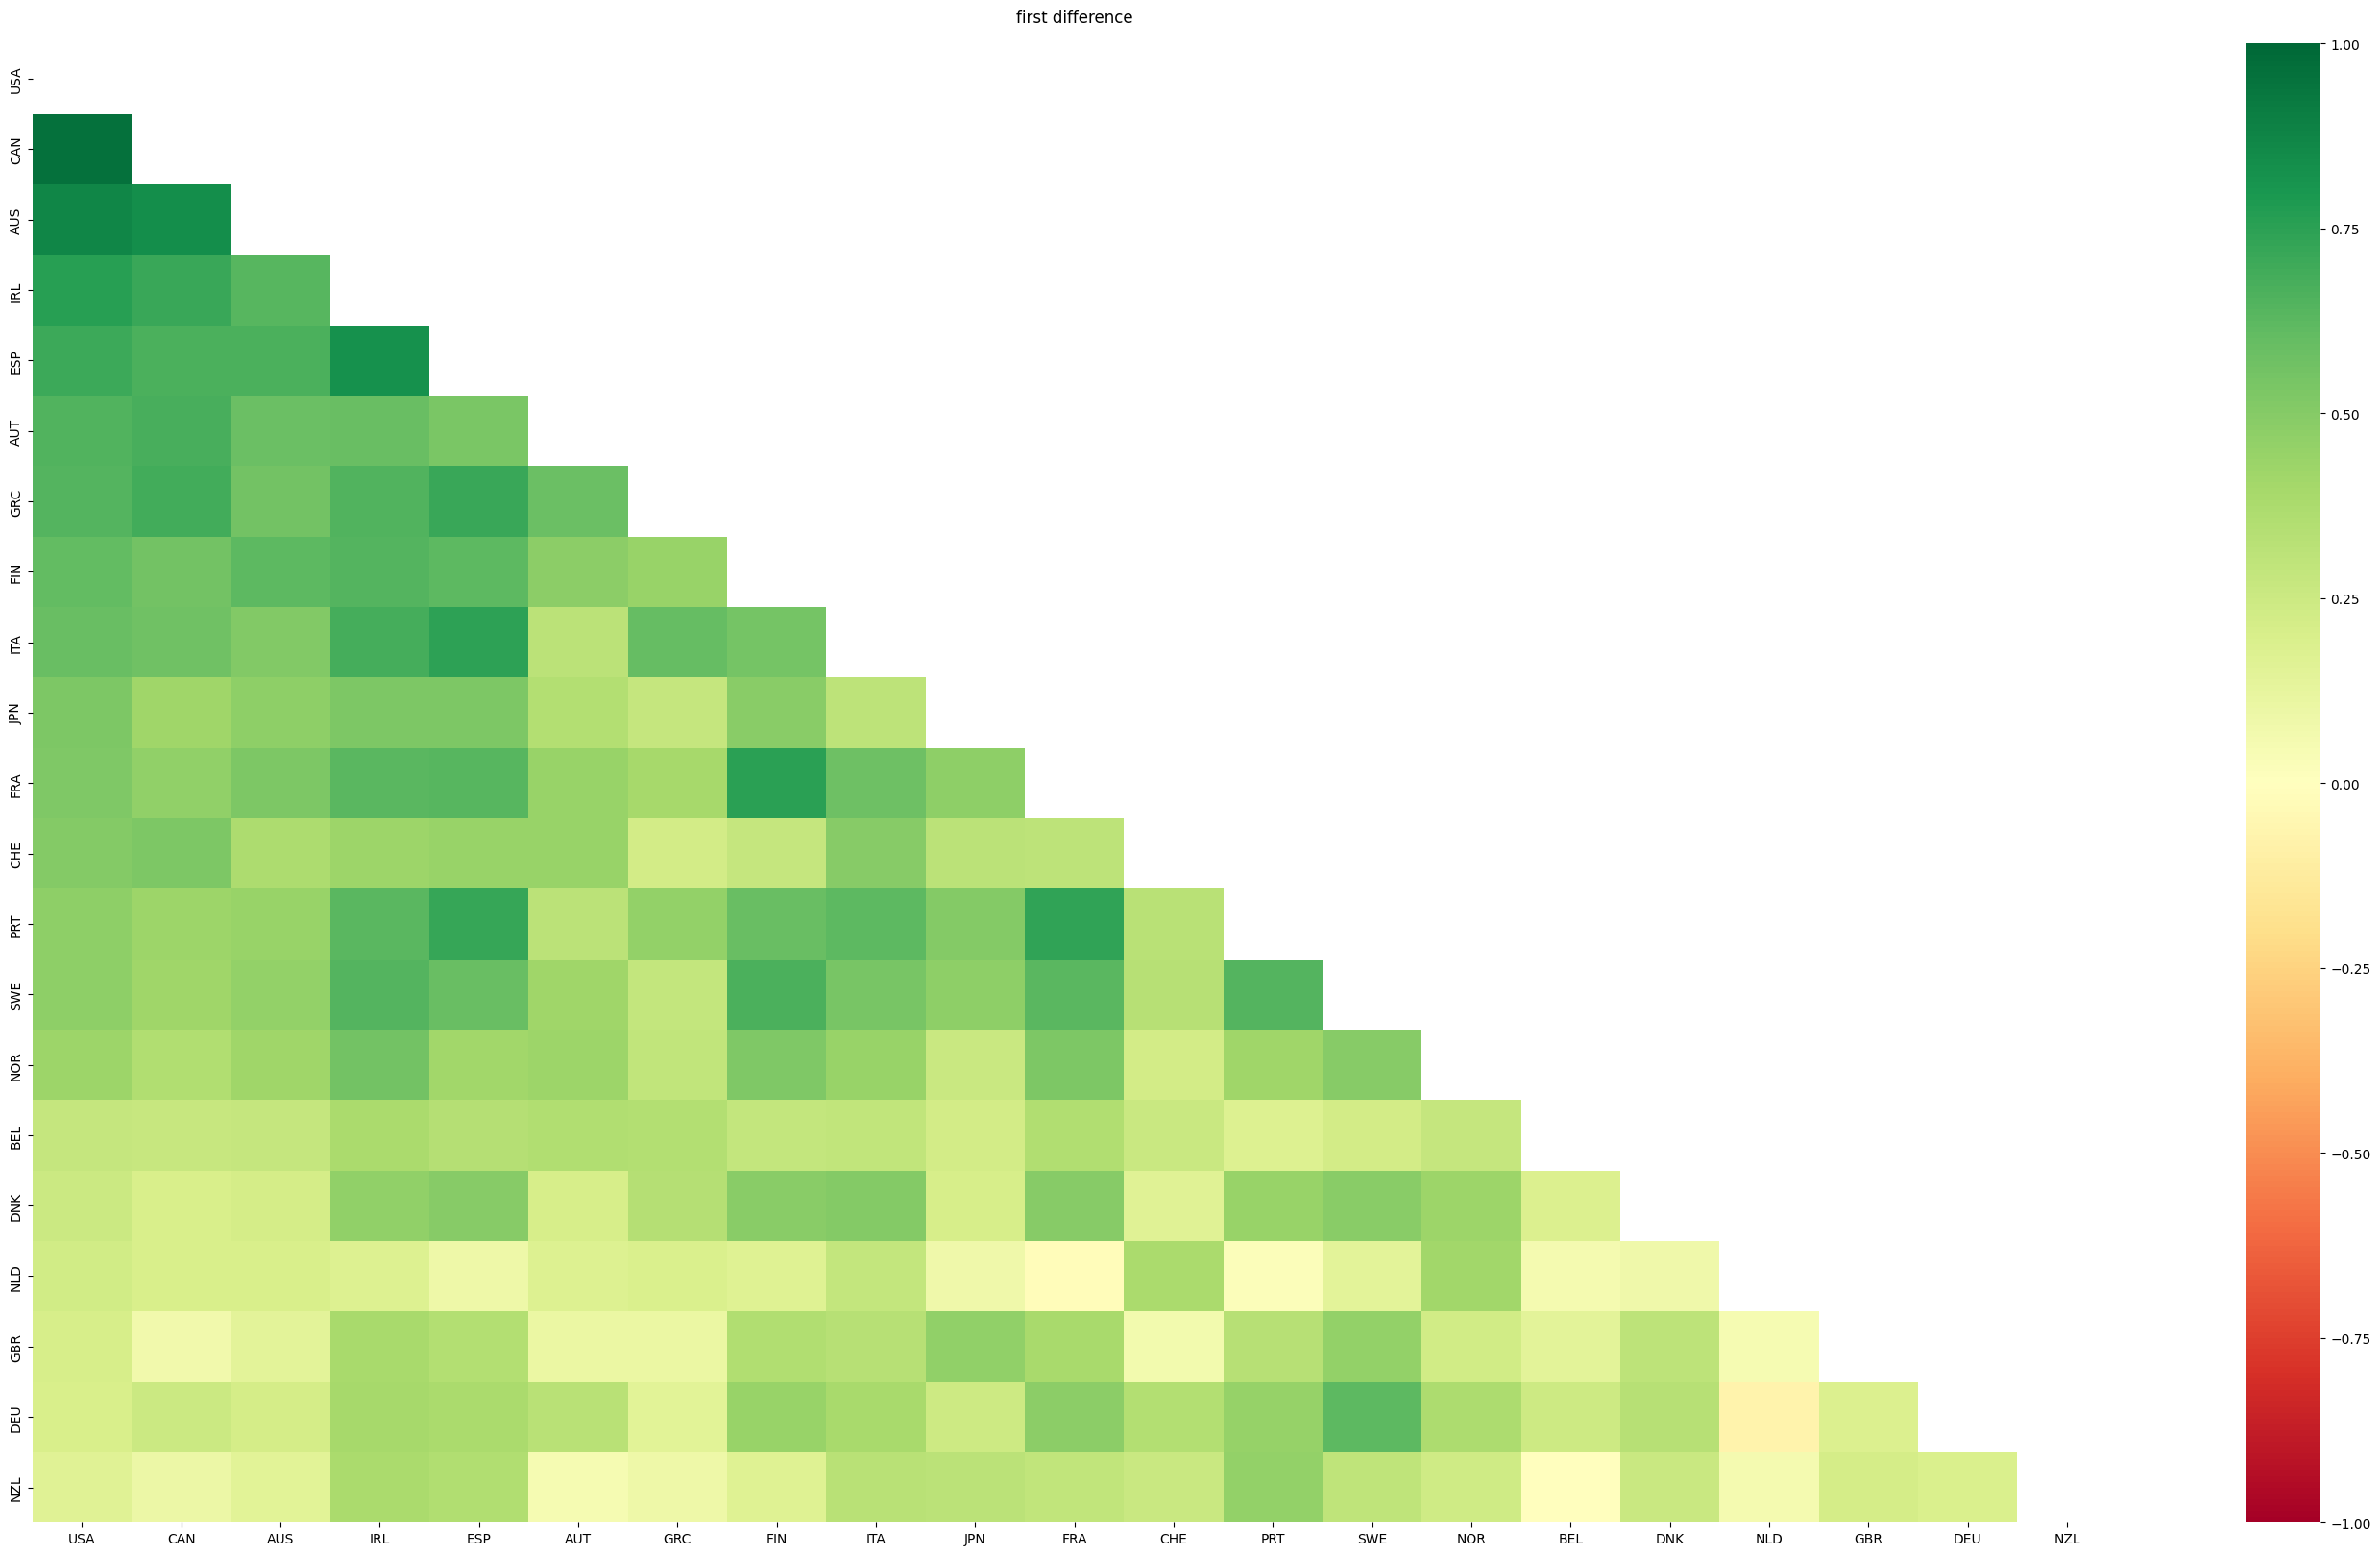

In [11]:
# show the heatmap visualisation

oecdemploymentheatmap = oecdemploymentdetrend.get_heatmap()

In [12]:
# show the reshaped version: 

oecdemploymentreshaped = oecdemploymentdetrend.get_organized()

oecdemploymentreshaped.tail()


,iso3_firstcountry,iso3_secondcountry,correlation
376,NLD,DEU,-0.073146
377,NLD,NZL,0.061871
397,GBR,DEU,0.186084
398,GBR,NZL,0.213312
419,DEU,NZL,0.192697


## IMF data: industrial production index, linear detrending

double check if i'm using the right data (should have a nice full series for all the countries?)

In [13]:
imfipidetrend = pc.Prepare_Correlations(imfipi, detrending="linear detrending", countries=frankelrosecountries).detrend(start_date="2000-01-01", end_date="2021-12-31")

imfipidetrend.data.tail()

,AUT,AUS,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,...,GRC,IRL,ITA,JPN,NLD,NOR,NZL,PRT,SWE,USA
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.027147,-0.004556,-0.025394,0.012318,-0.020333,-0.053564,0.018416,0.062526,0.000405,0.009945,...,0.085380,0.238299,0.038333,-0.045025,-0.040450,0.038247,0.009376,0.059891,0.039099,-0.037263
2021-01-01,-0.014325,-0.053498,0.014144,0.021887,0.017126,-0.059146,0.062995,0.070603,0.013615,0.009821,...,0.139344,0.307168,0.062543,-0.016733,-0.025389,0.072962,0.012209,0.053977,0.055399,-0.030721
2021-04-01,-0.004985,-0.057065,0.099221,0.015283,0.039161,-0.067846,0.059700,0.060519,0.018933,0.007997,...,0.161741,0.255422,0.071672,-0.015054,-0.011545,0.079603,0.024258,0.023516,0.063547,-0.016220
2021-07-01,0.012006,-0.063625,0.084984,0.028318,0.031478,-0.098038,0.108732,0.060141,0.038887,0.008883,...,0.180146,0.303085,0.085860,-0.033930,-0.004306,0.110702,-0.045215,0.023706,0.059056,-0.008840
2021-10-01,0.049633,-0.067922,0.057765,0.042329,0.025140,-0.075606,0.148337,0.094714,0.070345,0.010109,...,0.215080,0.278517,0.098044,-0.025227,-0.001597,0.084794,0.002024,0.055126,0.075011,0.001608


In [14]:
# show the correlation matrix

imfipimatrix = imfipidetrend.get_correlationmatrix()

imfipimatrix

,USA,JPN,DEU,FRA,AUT,ITA,SWE,ESP,NZL,PRT,...,FIN,AUS,DNK,NLD,BEL,CHE,GBR,GRC,IRL,NOR
USA,1.000000,0.841215,0.799439,0.767916,0.715297,0.596314,0.558480,0.531214,0.528841,0.462413,...,0.444453,0.438076,0.432231,0.426010,0.398418,0.361861,0.195465,0.145265,0.034092,-0.016829
JPN,0.841215,1.000000,0.801586,0.791607,0.793503,0.709933,0.718626,0.676468,0.692968,0.526182,...,0.670007,0.641133,0.434336,0.578133,0.587309,0.425711,0.264084,0.305952,0.072553,0.025367
DEU,0.799439,0.801586,1.000000,0.682053,0.791053,0.479366,0.448587,0.351775,0.404703,0.279313,...,0.448444,0.732701,0.090545,0.659523,0.549689,0.461807,-0.144580,-0.122433,-0.224028,-0.333578
FRA,0.767916,0.791607,0.682053,1.000000,0.779829,0.909215,0.808842,0.836602,0.689377,0.815087,...,0.614348,0.442720,0.675166,0.365713,0.472498,0.321688,0.523626,0.488652,0.322146,0.231522
AUT,0.715297,0.793503,0.791053,0.779829,1.000000,0.742333,0.787822,0.669023,0.553569,0.464735,...,0.803033,0.777149,0.417206,0.704748,0.806658,0.616990,0.236483,0.358448,-0.000137,0.015488
ITA,0.596314,0.709933,0.479366,0.909215,0.742333,1.000000,0.897600,0.923013,0.660670,0.852652,...,0.729241,0.364141,0.783362,0.280573,0.535106,0.403078,0.702308,0.730981,0.486391,0.446874
SWE,0.558480,0.718626,0.448587,0.808842,0.787822,0.897600,1.000000,0.889111,0.652085,0.706480,...,0.877895,0.513245,0.761218,0.393149,0.651454,0.436841,0.627520,0.731296,0.365902,0.387430
ESP,0.531214,0.676468,0.351775,0.836602,0.669023,0.923013,0.889111,1.000000,0.763392,0.884549,...,0.748741,0.330896,0.815772,0.209771,0.455076,0.274030,0.802011,0.826181,0.561872,0.539221
NZL,0.528841,0.692968,0.404703,0.689377,0.553569,0.660670,0.652085,0.763392,1.000000,0.648115,...,0.542085,0.383142,0.498770,0.399641,0.372288,0.070734,0.524578,0.503834,0.293933,0.270023
PRT,0.462413,0.526182,0.279313,0.815087,0.464735,0.852652,0.706480,0.884549,0.648115,1.000000,...,0.459202,0.094371,0.788741,-0.028392,0.178890,0.076628,0.782761,0.702247,0.594617,0.550058


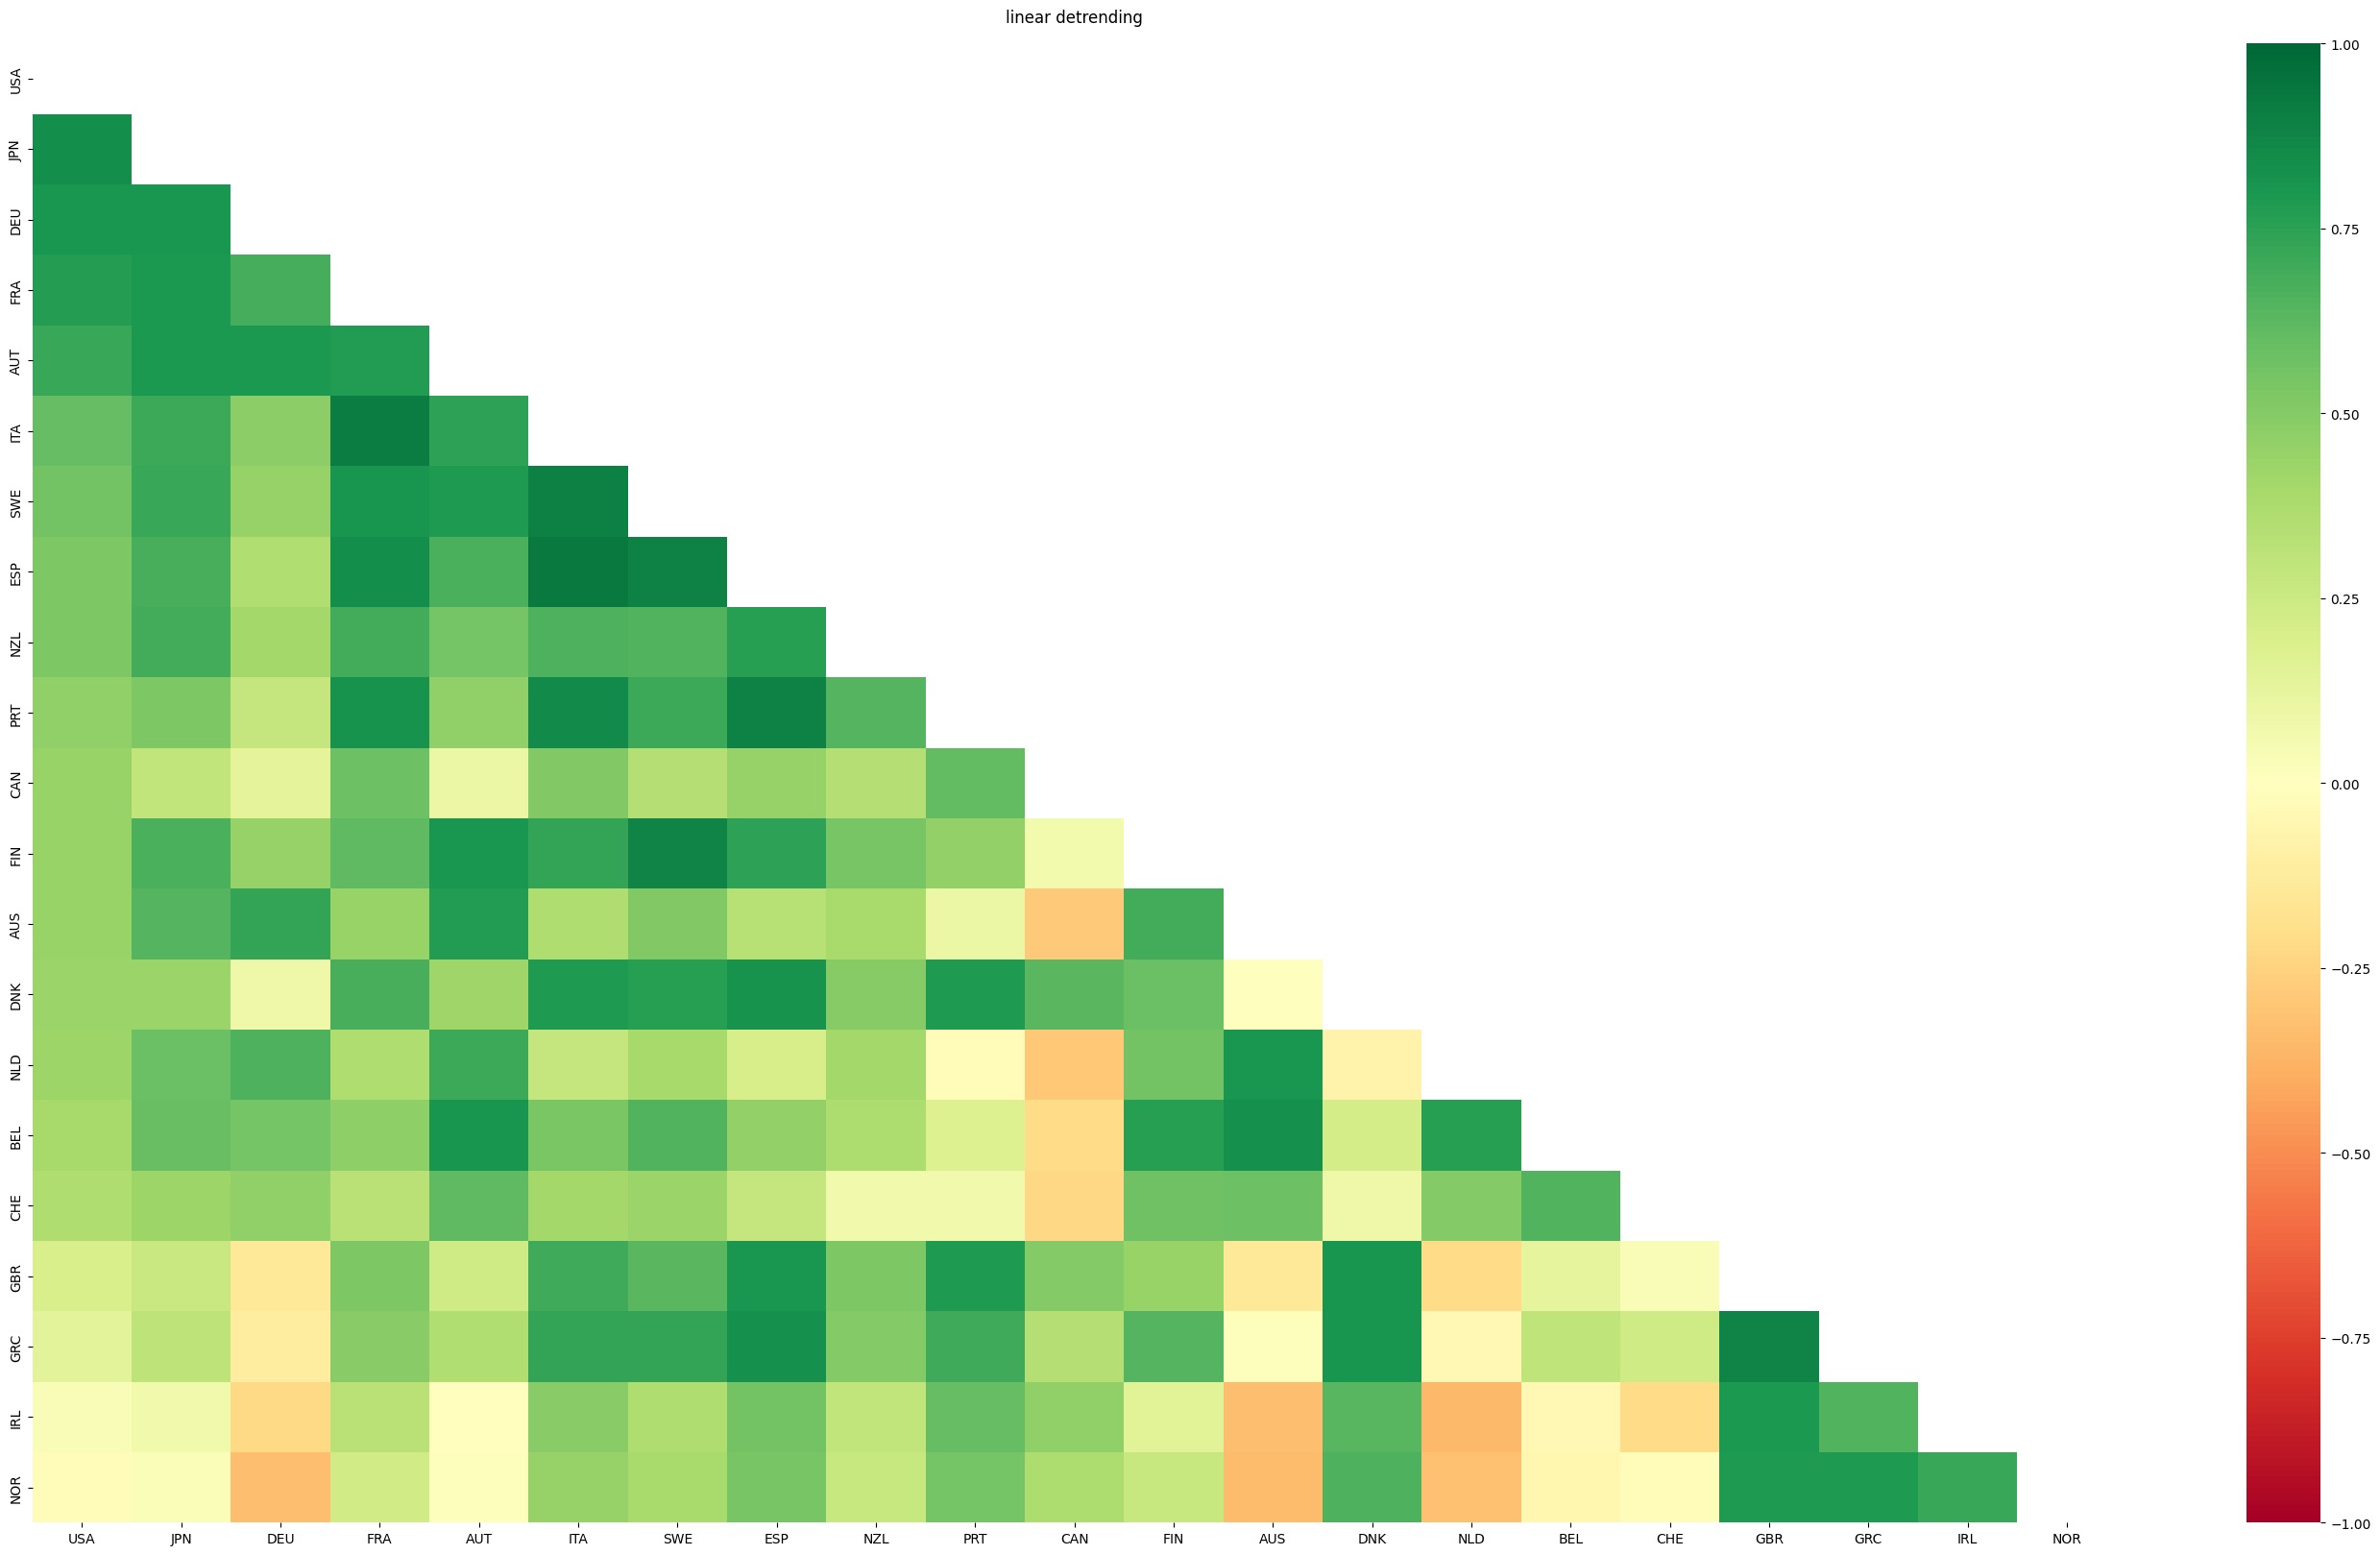

In [15]:
# show the heatmap visualisation

imfipiheatmap = imfipidetrend.get_heatmap()

In [16]:
# show the reshaped version: 

imfipireshaped = imfipidetrend.get_organized()

imfipireshaped.tail()


,iso3_firstcountry,iso3_secondcountry,correlation
376,GBR,IRL,0.792504
377,GBR,NOR,0.784399
397,GRC,IRL,0.654682
398,GRC,NOR,0.786589
419,IRL,NOR,0.718233


# look at some missing values in the oecd/imf data

In [17]:
lookatnansimf = imfipi[list(set(imfipi.columns) & set(frankelrosecountries))]
lookatnansimf = lookatnansimf.loc[(lookatnansimf.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansimf.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansimf[lookatnansimf.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_15104\2327253042.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansimf[lookatnansimf.isna().any(1)]


,CAN,BEL,FRA,USA,DEU,AUS,PRT,NZL,CHE,AUT,...,ESP,FIN,NOR,JPN,ITA,SWE,DNK,IRL,GRC,NLD
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,101.039949,71.282397,100.424965,92.451261,84.826325,67.916615,111.762827,85.362776,73.800515,66.118755,...,108.585343,82.654978,117.238018,100.808097,114.427091,90.301261,102.236210,51.734178,NaN,81.914914
1998-04-01,101.570927,71.778059,101.791517,93.067178,84.972578,68.744976,113.532586,84.820189,73.564419,67.042201,...,109.496505,83.938635,117.238018,97.774200,114.767280,91.533469,101.981494,51.828354,NaN,82.751631
1998-07-01,102.336458,71.426965,101.291559,93.757430,85.228519,68.322775,113.002572,84.807571,73.756977,68.076461,...,109.465085,83.406387,114.508530,96.567537,113.901345,93.428913,111.037223,55.438445,NaN,82.871639
1998-10-01,103.964121,70.872788,101.924840,95.116695,83.912249,68.571471,113.276717,83.722397,72.846849,68.002586,...,110.784699,83.187226,114.768481,95.912491,112.602443,92.930643,96.263688,55.877935,NaN,82.871639
1999-01-01,105.631622,70.439083,101.724856,95.806203,84.277879,69.556634,115.372403,85.526814,73.370437,68.187275,...,110.470505,84.721353,113.631194,97.326011,112.571517,93.065311,103.502188,59.017145,NaN,84.125047
1999-04-01,106.908397,71.124061,103.224731,96.733441,85.082267,68.320594,116.679161,84.302839,74.686600,70.440484,...,111.161731,86.192862,112.461413,97.291535,111.829287,93.361579,100.206085,58.420695,NaN,84.211719
1999-07-01,108.687344,72.469921,104.224648,97.599973,86.142596,68.908119,115.905463,86.410095,76.711255,71.326992,...,113.109732,86.067627,115.418359,98.705055,114.210608,93.795882,100.244102,63.223686,NaN,85.411791
1999-10-01,110.607653,73.981002,106.557787,99.324434,87.202925,69.324402,117.644761,88.656151,79.397507,75.353218,...,114.837798,88.415780,116.295695,100.049622,115.942477,95.492692,108.463450,65.986190,NaN,86.518524


In [18]:
lookatnansoecd = oecdemployment[list(set(oecdemployment.columns) & set(frankelrosecountries))]
lookatnansoecd = lookatnansoecd.loc[(lookatnansoecd.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansoecd.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansoecd[lookatnansoecd.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_15104\1990012608.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansoecd[lookatnansoecd.isna().any(1)]


,CAN,BEL,FRA,USA,DEU,AUS,PRT,NZL,CHE,AUT,...,ESP,FIN,NOR,JPN,ITA,SWE,DNK,IRL,GRC,NLD
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,68.53333,NaN,NaN,73.76122,NaN,67.52502,66.53934,69.64378,NaN,NaN,...,NaN,63.94550,NaN,69.92259,51.63791,NaN,NaN,NaN,55.60656,NaN
1998-04-01,68.73333,NaN,NaN,73.85172,NaN,67.72712,66.93438,69.02804,78.04481,NaN,...,NaN,62.68186,NaN,69.59286,51.87399,NaN,NaN,NaN,55.85064,NaN
1998-07-01,69.06667,NaN,NaN,73.81982,NaN,67.87545,66.79893,68.99194,NaN,NaN,...,NaN,64.54234,NaN,69.45416,52.07743,NaN,NaN,NaN,56.13288,NaN
1998-10-01,69.36667,NaN,NaN,73.94732,NaN,68.03826,67.12978,68.63940,NaN,NaN,...,NaN,64.99767,NaN,69.27718,52.19458,NaN,NaN,NaN,56.21347,NaN
1999-01-01,69.63333,59.19458,NaN,73.98901,NaN,67.99296,67.34690,69.25038,NaN,68.66560,...,52.92431,65.71420,NaN,69.08689,52.42956,NaN,76.23036,NaN,56.34367,NaN
1999-04-01,69.86667,59.02541,NaN,73.89809,NaN,68.06287,67.31715,69.21037,78.42708,68.58568,...,53.55390,66.69583,NaN,68.98834,52.60624,NaN,76.28310,63.08013,55.80833,NaN
1999-07-01,70.13333,59.54280,NaN,73.86935,NaN,68.26156,67.60715,69.55807,NaN,68.56554,...,54.12680,66.33366,NaN,69.01920,52.79292,NaN,76.19152,63.77315,55.70330,NaN
1999-10-01,70.50000,59.48914,NaN,74.02947,NaN,68.55671,67.77253,70.19951,NaN,68.35089,...,54.76043,66.36963,NaN,68.99085,52.94587,NaN,75.45797,64.18932,55.74428,NaN
2000-01-01,70.86667,60.07680,NaN,74.26451,NaN,68.51775,68.13086,70.00470,NaN,68.46355,...,55.46640,66.33025,77.42034,68.75898,53.01252,NaN,76.23196,64.62188,55.97697,71.81953


# regressions demo: working with shares data

In [19]:
original_countries_iso3 = list(data_detrended.data.columns)

# import the shares data (original version)
shares_original = pd.read_pickle(cleandatapath+'FullData_OriginalData_plusExports.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# import the shares data (alternative version) THIS IS THE ONE WE'RE USING
shares_alt = pd.read_pickle(cleandatapath+'FullData_OurData_NScode_TSimportShares_Taiwan.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# import the shares data (edited version of original)
shares_altoriginal = pd.read_pickle(cleandatapath+'FullData_OurData_NScode_CorrectedOriginalVersion.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# organize shares data
dataversions = [shares_original, shares_alt, shares_altoriginal]
dataversions_names = ['original', 'alt', 'altoriginal']
sharesdata_dict = dict.fromkeys(dataversions_names)

# put the 3 versions of the data in their own dictionary entries
for i, version in enumerate(dataversions):
    # taking the same year range as the correlation data and only using one obs per year since it is annual data
    # only consider countries that we calculated correlation coefficients for
    version = version[(version['iso3'].isin(original_countries_iso3)) & ((version['year'] >= 1990) & (version['year'] <= 2021))].groupby(['iso3', 'year']).first().reset_index()
    # getting the averages
    version = version[['iso3', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']].groupby(['iso3'], as_index=False).mean()
    version = version.dropna()
    version.name = dataversions_names[i]
    # print(version)
    
    sharesdata_dict[version.name] = version

# import consumption, centrality and nominal gdp shares
cons_ngdp_cent = pd.read_pickle(cleandatapath+'cons_ngdp_cent_for_regression.pkl')
# taking the same year range as the correlation data
# only consider countries that we calculated correlation coefficients for
cons_ngdp_cent = cons_ngdp_cent[(cons_ngdp_cent['iso3'].isin(original_countries_iso3)) & ((cons_ngdp_cent['year'] >= 1990) & (cons_ngdp_cent['year'] <= 2021))]

worldcons = cons_ngdp_cent[['year', 'iso3', 'worldtotcons', 'totcons']]
cent = cons_ngdp_cent[['year', 'iso3', 'cent_exp']]
ngdpshares = cons_ngdp_cent[['year', 'iso3', 'gdpshare']]

# import gravity model data from CEPII
cepii_data = pd.read_stata(gravitydatapath + 'Gravity_filtered.dta')
cepii_data.rename(columns={'iso3_o': 'iso3_firstcountry', 'iso3_d': 'iso3_secondcountry'}, inplace=True)

# import bti
bti = pd.read_pickle(cleandatapath+'bti_for_regression.pkl')
# find average across years for each pair
bti = bti[['iso3_o', 'iso3_d', 'bti']].groupby(['iso3_o', 'iso3_d'], as_index=False).mean()

In [20]:
# get data for each calculation method:
correlations_covariates_original = {}
correlations_covariates_alt = {}
correlations_covariates_altoriginal = {}

for method in dataversions_names:
    for data in correlationdata_dict:
        merged = reg.prepare_shares(correlation_data=correlationdata_dict[data], shares_data=sharesdata_dict, version=method)

        correlationdata_dict[data].rename(columns={'correlation': correlationdata_dict[data].name + ' correlations'}, inplace=True)

        # make columns
        merged['prod_worldconscorr'] = np.nan
        merged['prod_ngdpshare'] = np.nan
        merged['prod_cent'] = np.nan

        # calculate covariates for each row (which already has each unique country pair)
        for index, row in merged.iterrows():
            countryA = row['iso3_firstcountry']
            countryB = row['iso3_secondcountry']

            worldcorr_countryA = worldcons[worldcons['iso3'] == countryA][['totcons', 'worldtotcons']].corr()['totcons'][-1]
            worldcorr_countryB = worldcons[worldcons['iso3'] == countryB][['totcons', 'worldtotcons']].corr()['totcons'][-1]
            ngdpshare_countryA = ngdpshares[ngdpshares['iso3'] == countryA]['gdpshare'].mean()
            ngdpshare_countryB = ngdpshares[ngdpshares['iso3'] == countryB]['gdpshare'].mean()
            cent_countryA = cent[cent['iso3'] == countryA]['cent_exp'].mean()
            cent_countryB = cent[cent['iso3'] == countryB]['cent_exp'].mean()

            merged.at[index, 'prod_worldconscorr'] = worldcorr_countryA*worldcorr_countryB
            merged.at[index, 'prod_ngdpshare'] = ngdpshare_countryA*ngdpshare_countryB
            merged.at[index, 'prod_cent'] = cent_countryA*cent_countryB
            
        # merge bti with correlation data
        bti.rename(columns={'iso3_o': 'iso3_firstcountry', 'iso3_d': 'iso3_secondcountry'}, inplace=True)
        merged = pd.merge(left=merged, right=bti, on=['iso3_firstcountry', 'iso3_secondcountry'], how='left')
        
        # add CEPII data to our data
        merged = pd.merge(left=merged, right=cepii_data, how='left', on=['iso3_firstcountry', 'iso3_secondcountry'])
        
        if method == 'alt':
            correlations_covariates_alt[data] = merged
            correlations_covariates_alt[data].name = data + ', ' + method + ' shares calculation'
        elif method == 'original':
            correlations_covariates_original[data] = merged
            correlations_covariates_original[data].name = data + ', ' + method + ' shares calculation'
        elif method == 'altoriginal':
            correlations_covariates_altoriginal[data] = merged
            correlations_covariates_altoriginal[data].name = data + ', ' + method + ' shares calculation'

## basic regression tables

In [21]:
# run IV and OLS regressions (basic specification)
# three different detrending methods: hp, quadratic, fourth difference
# table 1: consumption on constant and prod_import
# table 2: output on constant and prod_export

# dataframe to hold results:
gdp_results = pd.DataFrame(columns=['Activity','IV-estimated coefficient','OLS-estimated coefficient'])
gdp_results.name = "Real GDP Correlations"
cons_results = gdp_results.copy()
cons_results.name = "Real Consumption Correlations"

for i, activity in enumerate(list(correlations_covariates_alt.keys())):
    if activity.startswith("Real GDP"):
        result_iv = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='IV', dependent_var=[activity + ' correlations'], endog_vars=['prod_export'], instrument_vars=['logdist', 'contig', 'comlang_off'])
        result_ols = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='OLS', dependent_var=[activity + ' correlations'], independent_vars=['prod_export'])
    elif activity.startswith("Real Consumption"):
        result_iv = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='IV', dependent_var=[activity + ' correlations'], endog_vars=['prod_import'], instrument_vars=['logdist', 'contig', 'comlang_off'])
        result_ols = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='OLS', dependent_var=[activity + ' correlations'], independent_vars=['prod_import'])
    
    beta_iv = round(result_iv.params[1],2)
    se_iv = round(result_iv.std_errors[1],2)
    p_iv = result_iv.pvalues[1]
    if p_iv < 0.1:
        beta_iv = str(beta_iv) + '*'
    if p_iv < 0.05:
        beta_iv = str(beta_iv) + '*'
    if p_iv < 0.01:
        beta_iv = str(beta_iv) + '*'
    
    display_iv = '(' + str(se_iv) + ')'

    beta_ols = round(result_ols.params[1],2)
    se_ols = round(result_ols.bse[1],2)
    p_ols = result_ols.pvalues[1]
    if p_ols < 0.1:
        beta_ols = str(beta_ols) + '*'
    if p_ols < 0.05:
        beta_ols = str(beta_ols) + '*'
    if p_ols < 0.01:
        beta_ols = str(beta_ols) + '*'

    display_ols = '(' + str(se_ols) + ')'

    if activity.startswith("Real GDP"):
        gdp_results.loc[i] = [activity, beta_iv + '\n' + display_iv, beta_ols + '\n' + display_ols]
    elif activity.startswith("Real Consumption"):
        cons_results.loc[i] = [activity, beta_iv + '\n' + display_iv, beta_ols + '\n' + display_ols]

In [22]:
# create a display version (with standard errors properly displayed)
gdp_results_disp = reg.pretty_print(gdp_results)
cons_results_disp = reg.pretty_print(cons_results)

In [23]:
display(gdp_results_disp)
display(cons_results_disp)

,Activity,IV-estimated coefficient,OLS-estimated coefficient
0,"Real GDP, fourth difference",0.42***(0.05),0.24***(0.02)
1,"Real GDP, HP Filter",0.49***(0.05),0.24***(0.03)
2,"Real GDP, quadratic detrending",0.92***(0.08),0.54***(0.04)


,Activity,IV-estimated coefficient,OLS-estimated coefficient
3,"Real Consumption, fourth difference",0.53***(0.05),0.31***(0.03)
4,"Real Consumption, HP Filter",0.64***(0.06),0.37***(0.03)
5,"Real Consumption, quadratic detrending",0.72***(0.09),0.48***(0.05)


## more regressions

In [24]:
# four tables: iv regressions on gdp, iv regressions on consumption, ols regressions on gdp, ols regressions on consumption
# include three different detrending methods in each table: hp, quadratic, fourth difference
# include four different specifications for each detrending type: correlation on currency share, correlation on currency share and bti, correlation on currency share and other currency share, correlation on everything

# save all the results

gdp_ols_exogs = [['prod_export'], ['prod_export', 'prod_import'], ['prod_export', 'bti'], ['prod_export', 'prod_import', 'bti']]
gdp_iv_exogs = [None, ['prod_import'], ['bti'], ['prod_import', 'bti']]

cons_ols_exogs = [['prod_import'], ['prod_import', 'prod_export'], ['prod_import', 'bti'], ['prod_import', 'prod_export', 'bti']]
cons_iv_exogs = [None, ['prod_export'], ['bti'], ['prod_export', 'bti']]

gdp_ols_results = {}
gdp_iv_results = {}
cons_ols_results = {}
cons_iv_results = {}

for i, activity in enumerate(list(correlations_covariates_alt.keys())):
    variables = ['prod_import', 'prod_export', 'bti']
    activity_split = activity.split(', ')
    correlation_used = activity_split[0]
    detrending_used = activity_split[1]

    if correlation_used == "Real GDP":
        for j, specification in enumerate(gdp_iv_exogs):
            result_iv = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='IV', dependent_var=[activity + ' correlations'], independent_vars=specification, endog_vars=['prod_export'], instrument_vars=['logdist', 'contig', 'comlang_off'])
            gdp_iv_results[activity + ', IV, specification ' + str(j)] = result_iv
        for j, specification in enumerate(gdp_ols_exogs):
            result_ols = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='OLS', dependent_var=[activity + ' correlations'], independent_vars=specification)
            gdp_ols_results[activity + ', OLS, specification ' + str(j)] = result_ols
    elif correlation_used == "Real Consumption":
        for j, specification in enumerate(cons_iv_exogs):
            result_iv = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='IV', dependent_var=[activity + ' correlations'], independent_vars=specification, endog_vars=['prod_import'], instrument_vars=['logdist', 'contig', 'comlang_off'])
            cons_iv_results[activity + ', IV, specification ' + str(j)] = result_iv
        for j, specification in enumerate(cons_ols_exogs):
            result_ols = reg.Regressions(correlations_covariates_alt[activity]).run_regression(method='OLS', dependent_var=[activity + ' correlations'], independent_vars=specification)
            cons_ols_results[activity + ', OLS, specification ' + str(j)] = result_ols


In [47]:
for regression in gdp_iv_results:
    display(gdp_iv_results[regression].first_stage)

,prod_export
R-squared,0.3726
Partial R-squared,0.3726
Shea's R-squared,0.3726
Partial F-statistic,290.19
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3643
,(14.756)
logdist,-0.1410


,prod_export
R-squared,0.9621
Partial R-squared,0.0246
Shea's R-squared,0.0246
Partial F-statistic,10.957
P-value (Partial F-stat),0.0120
Partial F-stat Distn,chi2(3)
==========================,===========
const,-0.1232
,(-4.3385)
prod_import,1.0878


,prod_export
R-squared,0.3394
Partial R-squared,0.2649
Shea's R-squared,0.2649
Partial F-statistic,156.04
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3144
,(12.305)
bti,-2.0216


,prod_export
R-squared,0.9672
Partial R-squared,0.0307
Shea's R-squared,0.0307
Partial F-statistic,11.187
P-value (Partial F-stat),0.0108
Partial F-stat Distn,chi2(3)
==========================,===========
const,-0.1404
,(-4.6478)
prod_import,1.0887


,prod_export
R-squared,0.3726
Partial R-squared,0.3726
Shea's R-squared,0.3726
Partial F-statistic,290.19
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3643
,(14.756)
logdist,-0.1410


,prod_export
R-squared,0.9621
Partial R-squared,0.0246
Shea's R-squared,0.0246
Partial F-statistic,10.957
P-value (Partial F-stat),0.0120
Partial F-stat Distn,chi2(3)
==========================,===========
const,-0.1232
,(-4.3385)
prod_import,1.0878


,prod_export
R-squared,0.3394
Partial R-squared,0.2649
Shea's R-squared,0.2649
Partial F-statistic,156.04
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3144
,(12.305)
bti,-2.0216


,prod_export
R-squared,0.9672
Partial R-squared,0.0307
Shea's R-squared,0.0307
Partial F-statistic,11.187
P-value (Partial F-stat),0.0108
Partial F-stat Distn,chi2(3)
==========================,===========
const,-0.1404
,(-4.6478)
prod_import,1.0887


,prod_export
R-squared,0.3726
Partial R-squared,0.3726
Shea's R-squared,0.3726
Partial F-statistic,290.19
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3643
,(14.756)
logdist,-0.1410


,prod_export
R-squared,0.9621
Partial R-squared,0.0246
Shea's R-squared,0.0246
Partial F-statistic,10.957
P-value (Partial F-stat),0.0120
Partial F-stat Distn,chi2(3)
==========================,===========
const,-0.1232
,(-4.3385)
prod_import,1.0878


,prod_export
R-squared,0.3394
Partial R-squared,0.2649
Shea's R-squared,0.2649
Partial F-statistic,156.04
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3144
,(12.305)
bti,-2.0216


,prod_export
R-squared,0.9672
Partial R-squared,0.0307
Shea's R-squared,0.0307
Partial F-statistic,11.187
P-value (Partial F-stat),0.0108
Partial F-stat Distn,chi2(3)
==========================,===========
const,-0.1404
,(-4.6478)
prod_import,1.0887


In [48]:
for regression in cons_iv_results:
    display(cons_iv_results[regression].first_stage)

,prod_import
R-squared,0.4133
Partial R-squared,0.4133
Shea's R-squared,0.4133
Partial F-statistic,344.21
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3675
,(16.620)
logdist,-0.1390


,prod_import
R-squared,0.9645
Partial R-squared,0.0880
Shea's R-squared,0.0880
Partial F-statistic,29.535
P-value (Partial F-stat),1.729e-06
Partial F-stat Distn,chi2(3)
==========================,===========
const,0.1891
,(6.7929)
prod_export,0.8638


,prod_import
R-squared,0.3736
Partial R-squared,0.3062
Shea's R-squared,0.3062
Partial F-statistic,181.25
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3364
,(13.736)
bti,-3.7154


,prod_import
R-squared,0.9689
Partial R-squared,0.0852
Shea's R-squared,0.0852
Partial F-statistic,30.590
P-value (Partial F-stat),1.037e-06
Partial F-stat Distn,chi2(3)
==========================,============
const,0.1889
,(7.0423)
prod_export,0.8729


,prod_import
R-squared,0.4133
Partial R-squared,0.4133
Shea's R-squared,0.4133
Partial F-statistic,344.21
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3675
,(16.620)
logdist,-0.1390


,prod_import
R-squared,0.9645
Partial R-squared,0.0880
Shea's R-squared,0.0880
Partial F-statistic,29.535
P-value (Partial F-stat),1.729e-06
Partial F-stat Distn,chi2(3)
==========================,===========
const,0.1891
,(6.7929)
prod_export,0.8638


,prod_import
R-squared,0.3736
Partial R-squared,0.3062
Shea's R-squared,0.3062
Partial F-statistic,181.25
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3364
,(13.736)
bti,-3.7154


,prod_import
R-squared,0.9689
Partial R-squared,0.0852
Shea's R-squared,0.0852
Partial F-statistic,30.590
P-value (Partial F-stat),1.037e-06
Partial F-stat Distn,chi2(3)
==========================,============
const,0.1889
,(7.0423)
prod_export,0.8729


,prod_import
R-squared,0.4133
Partial R-squared,0.4133
Shea's R-squared,0.4133
Partial F-statistic,344.21
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3675
,(16.620)
logdist,-0.1390


,prod_import
R-squared,0.9645
Partial R-squared,0.0880
Shea's R-squared,0.0880
Partial F-statistic,29.535
P-value (Partial F-stat),1.729e-06
Partial F-stat Distn,chi2(3)
==========================,===========
const,0.1891
,(6.7929)
prod_export,0.8638


,prod_import
R-squared,0.3736
Partial R-squared,0.3062
Shea's R-squared,0.3062
Partial F-statistic,181.25
P-value (Partial F-stat),0.0000
Partial F-stat Distn,chi2(3)
==========================,===========
const,1.3364
,(13.736)
bti,-3.7154


,prod_import
R-squared,0.9689
Partial R-squared,0.0852
Shea's R-squared,0.0852
Partial F-statistic,30.590
P-value (Partial F-stat),1.037e-06
Partial F-stat Distn,chi2(3)
==========================,============
const,0.1889
,(7.0423)
prod_export,0.8729


In [26]:
def results_table(results_dict):
    df = pd.DataFrame()

    # Create a dictionary to store data for each detrending type
    data_by_detrending = {}

    # Extract unique covariates from all regression results
    all_covariates = set()
    for result in results_dict.values():
        all_covariates.update(result.params.index)
    all_covariates.remove('const')

    # Loop through each regression specification
    for key, result in results_dict.items():
        description_parts = key.split(', ')
        activity = description_parts[0]
        detrending = description_parts[1]
        estimation = description_parts[2]
        specification = description_parts[3]

        # Extract coefficients and standard errors
        coefficients = result.params
        if estimation == 'OLS':
            std_errors = result.bse
        elif estimation == 'IV':
            std_errors = result.std_errors
        p_values = result.pvalues
        nobs = result.nobs

        # Create a DataFrame for this specification
        spec_df = pd.DataFrame({'Coefficient': coefficients, 'Std. Error': std_errors, 'p-value': p_values}, index=coefficients.index)

        # Reindex with all_covariates to ensure consistent order
        spec_df = spec_df.reindex(all_covariates)

        # Store data for this specification and detrending type
        if detrending in data_by_detrending:
            data_by_detrending[detrending][specification] = spec_df
        else:
            data_by_detrending[detrending] = {specification: spec_df}

    # Create a MultiIndex with detrending types as the outer index and covariates as the inner index
    index = pd.MultiIndex.from_product([data_by_detrending.keys(), all_covariates], names=['Detrending', 'Covariates'])

    # Create an empty DataFrame with the MultiIndex and initialize all cells with empty strings
    df = pd.DataFrame(index=index).fillna('')

    # Populate the DataFrame with the estimated coefficients and standard errors (rounded to 2 decimal points)
    for detrending, spec_data in data_by_detrending.items():
        for spec, spec_df in spec_data.items():
            for covariate in all_covariates:
                if covariate in spec_df.index:
                    coef = spec_df.loc[covariate, 'Coefficient']
                    std_err = spec_df.loc[covariate, 'Std. Error']
                    p_value = spec_df.loc[covariate, 'p-value']
                    stars = ""
                    if p_value <= 0.01:
                        stars = "***"
                    elif p_value <= 0.05:
                        stars = "**"
                    elif p_value <= 0.1:
                        stars = "*"

                    df.loc[(detrending, covariate), spec] = f"{coef:.2f}{stars} ({std_err:.2f})"

    # fix appearance
    df.rename(columns={'specification 0': activity + ', ' + estimation + ' (1)', 
                    'specification 1': activity + ', ' + estimation + ' (2)', 
                    'specification 2': activity + ', ' + estimation + ' (3)', 
                    'specification 3': activity + ', ' + estimation + ' (4)'}, inplace=True)
    df.replace("nan (nan)", "", inplace=True)

    # Calculate the number of observations for each specification and store it in a list
    num_observations_by_spec = {spec: result.nobs for spec, result in results_dict.items()}

    # Summarize the number of observations for each specification
    num_obs_summary = {
        activity + ', ' + estimation + ' (1)': int(num_observations_by_spec.get(activity + ', ' + detrending + ', ' + estimation + ', specification 0')),
        activity + ', ' + estimation + ' (2)': int(num_observations_by_spec.get(activity + ', ' + detrending + ', ' + estimation + ', specification 1')),
        activity + ', ' + estimation + ' (3)': int(num_observations_by_spec.get(activity + ', ' + detrending + ', ' + estimation + ', specification 2')),
        activity + ', ' + estimation + ' (4)': int(num_observations_by_spec.get(activity + ', ' + detrending + ', ' + estimation + ', specification 3')),
    }

    # Create a new DataFrame with the number of observations summary
    num_obs_summary_df = pd.DataFrame(num_obs_summary, index=pd.MultiIndex.from_tuples([('n', '')]))

    df = pd.concat([df, num_obs_summary_df])

    return df

In [27]:
results_table(gdp_ols_results)

Real GDP, OLS (1) Real GDP, OLS (2)  \
Detrending           Covariates                                        
fourth difference    prod_import                      0.60*** (0.16)   
                     bti                                               
                     prod_export    0.24*** (0.02)    -0.30** (0.15)   
HP Filter            prod_import                      0.67*** (0.16)   
                     bti                                               
                     prod_export    0.24*** (0.03)    -0.36** (0.15)   
quadratic detrending prod_import                      1.08*** (0.20)   
                     bti                                               
                     prod_export    0.54*** (0.04)    -0.44** (0.18)   
n                                              496               496   

                                 Real GDP, OLS (3) Real GDP, OLS (4)  
Detrending           Covariates                                       
fourth difference    prod_import                         0.19 (0.17)  
                     bti           10.94*** (2.01)   10.96*** (1.97)  
                     prod_export    0.19*** (0.03)       0.02 (0.15)  
HP Filter            prod_import                         0.24 (0.16)  
                     bti           12.12*** (1.91)   12.14*** (1.86)  
                     prod_export    0.17*** (0.03)      -0.04 (0.15)  
quadratic detrending prod_import                      0.89*** (0.28)  
                     bti           13.30*** (3.46)   13.37*** (3.17)  
                     prod_export    0.46*** (0.04)      -0.34 (0.25)  
n                                              431               431

In [28]:
results_table(gdp_iv_results)

Real GDP, IV (1) Real GDP, IV (2)  \
Detrending           Covariates                                      
fourth difference    prod_import                    3.61*** (1.31)   
                     bti                                             
                     prod_export   0.42*** (0.05)   -3.13** (1.23)   
HP Filter            prod_import                    5.19*** (1.66)   
                     bti                                             
                     prod_export   0.49*** (0.05)  -4.61*** (1.56)   
quadratic detrending prod_import                   10.35*** (3.38)   
                     bti                                             
                     prod_export   0.92*** (0.08)  -9.15*** (3.17)   
n                                             496              496   

                                 Real GDP, IV (3) Real GDP, IV (4)  
Detrending           Covariates                                     
fourth difference    prod_import                       1.10 (0.94)  
                     bti           9.87*** (2.11)  11.67*** (2.08)  
                     prod_export   0.24*** (0.06)     -0.84 (0.88)  
HP Filter            prod_import                     2.75** (1.12)  
                     bti           9.31*** (2.07)  14.11*** (2.50)  
                     prod_export   0.31*** (0.06)   -2.40** (1.05)  
quadratic detrending prod_import                    7.81*** (2.75)  
                     bti              5.14 (4.86)  18.80*** (5.44)  
                     prod_export   0.87*** (0.12)  -6.84*** (2.60)  
n                                             431              431

In [29]:
results_table(cons_ols_results)

Real Consumption, OLS (1)  \
Detrending           Covariates                              
fourth difference    prod_export                             
                     bti                                     
                     prod_import            0.31*** (0.03)   
HP Filter            prod_export                             
                     bti                                     
                     prod_import            0.37*** (0.03)   
quadratic detrending prod_export                             
                     bti                                     
                     prod_import            0.48*** (0.05)   
n                                                      496   

                                 Real Consumption, OLS (2)  \
Detrending           Covariates                              
fourth difference    prod_export               0.04 (0.14)   
                     bti                                     
                     prod_import              0.27* (0.15)   
HP Filter            prod_export               0.05 (0.16)   
                     bti                                     
                     prod_import              0.32* (0.17)   
quadratic detrending prod_export               0.04 (0.23)   
                     bti                                     
                     prod_import              0.44* (0.25)   
n                                                      496   

                                 Real Consumption, OLS (3)  \
Detrending           Covariates                              
fourth difference    prod_export                             
                     bti                   11.77*** (2.13)   
                     prod_import            0.22*** (0.03)   
HP Filter            prod_export                             
                     bti                   13.73*** (2.10)   
                     prod_import            0.26*** (0.03)   
quadratic detrending prod_export                             
                     bti                   12.08*** (3.41)   
                     prod_import            0.46*** (0.06)   
n                                                      431   

                                 Real Consumption, OLS (4)  
Detrending           Covariates                             
fourth difference    prod_export             0.37** (0.17)  
                     bti                   11.47*** (2.17)  
                     prod_import              -0.17 (0.18)  
HP Filter            prod_export             0.42** (0.20)  
                     bti                   13.38*** (2.16)  
                     prod_import              -0.19 (0.21)  
quadratic detrending prod_export              -0.06 (0.29)  
                     bti                   12.14*** (3.43)  
                     prod_import               0.53 (0.33)  
n                                                      431

In [30]:
results_table(cons_iv_results)

Real Consumption, IV (1)  \
Detrending           Covariates                             
fourth difference    prod_export                            
                     bti                                    
                     prod_import           0.53*** (0.05)   
HP Filter            prod_export                            
                     bti                                    
                     prod_import           0.64*** (0.06)   
quadratic detrending prod_export                            
                     bti                                    
                     prod_import           0.72*** (0.09)   
n                                                     496   

                                 Real Consumption, IV (2)  \
Detrending           Covariates                             
fourth difference    prod_export          -2.44*** (0.74)   
                     bti                                    
                     prod_import           3.02*** (0.82)   
HP Filter            prod_export          -3.16*** (0.87)   
                     bti                                    
                     prod_import           3.87*** (0.96)   
quadratic detrending prod_export          -2.94*** (1.09)   
                     bti                                    
                     prod_import           3.73*** (1.21)   
n                                                     496   

                                 Real Consumption, IV (3)  \
Detrending           Covariates                             
fourth difference    prod_export                            
                     bti                   9.72*** (2.31)   
                     prod_import           0.34*** (0.07)   
HP Filter            prod_export                            
                     bti                  10.49*** (2.37)   
                     prod_import           0.44*** (0.07)   
quadratic detrending prod_export                            
                     bti                    9.25** (3.80)   
                     prod_import           0.62*** (0.13)   
n                                                     431   

                                 Real Consumption, IV (4)  
Detrending           Covariates                            
fourth difference    prod_export             -1.07 (0.69)  
                     bti                  11.60*** (2.23)  
                     prod_import             1.42* (0.76)  
HP Filter            prod_export           -1.74** (0.79)  
                     bti                  13.58*** (2.45)  
                     prod_import            2.20** (0.87)  
quadratic detrending prod_export             -1.74 (1.13)  
                     bti                  12.29*** (3.46)  
                     prod_import             2.38* (1.26)  
n                                                     431

In [31]:
# create_latex_table(gdp_ols_results, ['prod_export', 'prod_import', 'prod_cent'], True, "testoutput")

## basic usage of gabrielle's latex table function

In [32]:
# item1 = reg.Regressions(correlations_covariates_alt['Real GDP, HP Filter']).run_regression(method='OLS', dependent_var=['Real GDP, HP Filter correlations'], independent_vars=['prod_export'])
# item2 = reg.Regressions(correlations_covariates_alt['Real GDP, HP Filter']).run_regression(method='OLS', dependent_var=['Real GDP, HP Filter correlations'], independent_vars=['prod_export', 'prod_import'])
# item3 = reg.Regressions(correlations_covariates_alt['Real GDP, HP Filter']).run_regression(method='OLS', dependent_var=['Real GDP, HP Filter correlations'], independent_vars=['prod_export', 'prod_cent'])

In [33]:
# create_latex_table([item1, item2, item3], ['prod_export', 'prod_import', 'prod_cent'], "Real GDP, HP Filter correlations", True, "testoutput")

# regressions demo: working with frankel and rose data

In [34]:
# import the frankel and rose data (the original data is in a stata dataset)
instruments = pd.read_stata(ocadatapath + 'DATAV4.dta')
instruments.name = 'Normalized by total trade'

# Load dataframe with IMF country code in 'IMF' column and iso3 country code in 'iso3' column
country_code_mapping = pd.read_csv(rawdatapath+'Country_iso_codes.csv')
country_code_mapping = country_code_mapping[['iso3','IMF']]

# Make a dictionary out of the dataframe
dict = country_code_mapping.set_index('IMF').to_dict()['iso3']

# Replace IMF country codes in CountryCode and PartnerCode columns
# by corresponding ISO3 country codes
instruments['count1']= instruments['count1'].map(dict)
instruments['count2']= instruments['count2'].map(dict)

# log distance
instruments['distance'] = np.log(instruments['distance'])

# log trade intensity
instruments['wt'] = np.log(instruments['wt'])

# complete batch of correlations used in paper
versions = ['dy', 'di', 'de', 'du', 'ty', 'ti', 'te', 'tu', 'hy', 'hi', 'he', 'hu', 'sy', 'si', 'se', 'su', 'oy', 'oi', 'oe', 'ou']

# variable descriptions from stata
stata_descriptions = ["Bilateral Output Correlation, Differenced Data", "Bilateral IP Correlation, Differenced Data", "Bilateral Empl'y Correlation, Differenced Data", 
 "Bilateral Unem't Correlation, Differenced Data", "Bilateral Output Correlation, De-Trended Data", "Bilateral IP Correlation, De-Trended Data", 
 "Bilateral Empl'y Correlation, De-Trended Data", "Bilateral Unem't Correlation, De-Trended Data", "Bilateral Output Correlation, HP-Filtered Data", 
 "Bilateral IP Correlation, HP-Filtered Data", "Bilateral Empl'y Correlation, HP-Filtered Data", "Bilateral Unem't Correlation, HP-Filtered Data", 
 "Bilateral Output Correlation, HP-SA Data", "Bilateral IP Correlation, HP-SA Data", "Bilateral Empl'y Correlation, HP-SA Data", 
 "Bilateral Unem't Correlation, HP-SA Data", "Bilateral Output Correlation, Oil De-Trended Data", "Bilateral IP Correlation, Oil De-Trended Data", 
 "Bilateral Empl'y Correlation, Oil De-Trended Data", "Bilateral Unem't Correlation, Oil De-Trended Data"]

# multiply correlation coefficients by 100
for i, version in enumerate(versions):
    instruments[version] = instruments[version]*100

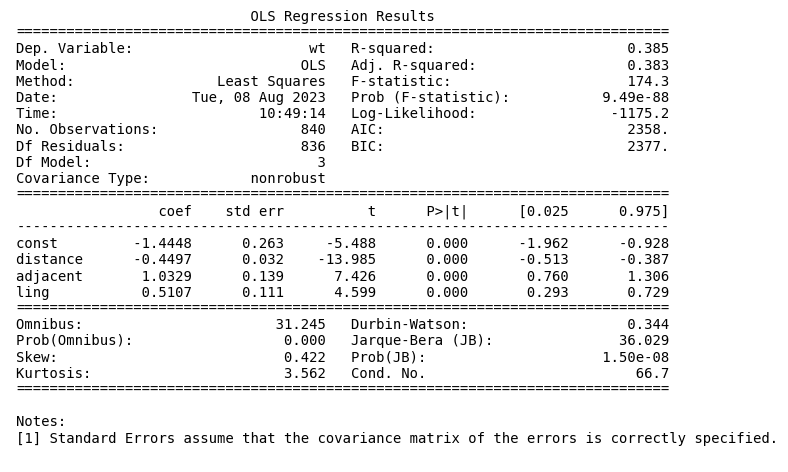

In [35]:
# look at the first stage results
y = instruments[['wt']]
X = instruments[['distance', 'adjacent', 'ling']]
X = sm.add_constant(X)
firststagemodel = sm.OLS(y,X)
firststageresults = firststagemodel.fit()

plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(firststageresults.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()

In [36]:
# run IV regressions

# dataframe to hold results:
iv_results_2sls = pd.DataFrame(columns=['Type of correlation', 'Description', 'Estimated slope coefficient (normalized by total trade)','Standard error'])
iv_results_2sls.name = "2SLS"
iv_results_ml = iv_results_2sls.copy()
iv_results_ml.name = "ML"
iv_results_gmm = iv_results_2sls.copy()
iv_results_gmm.name = "GMM"

for i, version in enumerate(versions):
    for table in [iv_results_2sls, iv_results_ml, iv_results_gmm]:
        result = reg.Regressions(instruments).run_regression(method='IV', dependent_var=[version], endog_vars=['wt'], instrument_vars=['distance', 'adjacent', 'ling'], iv_type=table.name)
        beta = result.params[1]
        se = result.std_errors[1]
        description = stata_descriptions[i]

        table.loc[i] = [version, description, beta, se]

In [37]:
# show the table of coefficients of iv results (2sls)
iv_results_2sls[:16]

,Type of correlation,Description,Estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",10.314427,1.392068
1,di,"Bilateral IP Correlation, Differenced Data",10.141986,1.465044
2,de,"Bilateral Empl'y Correlation, Differenced Data",8.628224,1.804666
3,du,"Bilateral Unem't Correlation, Differenced Data",7.791396,1.516854
4,ty,"Bilateral Output Correlation, De-Trended Data",11.318741,1.720126
5,ti,"Bilateral IP Correlation, De-Trended Data",9.336487,2.071980
6,te,"Bilateral Empl'y Correlation, De-Trended Data",8.625642,2.422716
7,tu,"Bilateral Unem't Correlation, De-Trended Data",10.839718,2.175144
8,hy,"Bilateral Output Correlation, HP-Filtered Data",8.603436,1.420853
9,hi,"Bilateral IP Correlation, HP-Filtered Data",9.764923,1.492478


In [38]:
# show the table of coefficients of iv results (mle)
iv_results_ml[:16]

,Type of correlation,Description,Estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",10.339727,1.398750
1,di,"Bilateral IP Correlation, Differenced Data",10.145964,1.466169
2,de,"Bilateral Empl'y Correlation, Differenced Data",8.730872,1.842768
3,du,"Bilateral Unem't Correlation, Differenced Data",7.915863,1.542577
4,ty,"Bilateral Output Correlation, De-Trended Data",11.319086,1.720214
5,ti,"Bilateral IP Correlation, De-Trended Data",9.350102,2.088663
6,te,"Bilateral Empl'y Correlation, De-Trended Data",8.700687,2.468557
7,tu,"Bilateral Unem't Correlation, De-Trended Data",10.854640,2.180284
8,hy,"Bilateral Output Correlation, HP-Filtered Data",8.639093,1.431386
9,hi,"Bilateral IP Correlation, HP-Filtered Data",9.858536,1.513282


In [39]:
# show the table of coefficients of iv results (gmm)
iv_results_gmm[:16]

,Type of correlation,Description,Estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",10.235604,1.390421
1,di,"Bilateral IP Correlation, Differenced Data",10.289274,1.424074
2,de,"Bilateral Empl'y Correlation, Differenced Data",8.270030,1.802229
3,du,"Bilateral Unem't Correlation, Differenced Data",8.487269,1.493727
4,ty,"Bilateral Output Correlation, De-Trended Data",11.340234,1.705244
5,ti,"Bilateral IP Correlation, De-Trended Data",9.084380,2.059606
6,te,"Bilateral Empl'y Correlation, De-Trended Data",8.240802,2.416572
7,tu,"Bilateral Unem't Correlation, De-Trended Data",10.399746,2.133704
8,hy,"Bilateral Output Correlation, HP-Filtered Data",8.524010,1.419694
9,hi,"Bilateral IP Correlation, HP-Filtered Data",10.260601,1.457049


In [40]:
# look at a regular OLS regression of correlations on wt
ols_results = pd.DataFrame(columns=['Type of correlation', 'Description', 'OLS estimated slope coefficient (normalized by total trade)','Standard error'])

for i, version in enumerate(versions):
    result = reg.Regressions(instruments).run_regression(method='OLS', dependent_var=[version], independent_vars=['wt'])
    beta = result.params[1]
    se = result.bse[1]
    description = stata_descriptions[i]

    ols_results.loc[i] = [version, description, beta, se]

In [41]:
ols_results[:16]

,Type of correlation,Description,OLS estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",7.126096,0.879494
1,di,"Bilateral IP Correlation, Differenced Data",6.851032,0.954579
2,de,"Bilateral Empl'y Correlation, Differenced Data",5.685214,1.116036
3,du,"Bilateral Unem't Correlation, Differenced Data",3.335948,0.979877
4,ty,"Bilateral Output Correlation, De-Trended Data",7.192820,1.133608
5,ti,"Bilateral IP Correlation, De-Trended Data",8.261980,1.185371
6,te,"Bilateral Empl'y Correlation, De-Trended Data",6.227779,1.450866
7,tu,"Bilateral Unem't Correlation, De-Trended Data",6.989379,1.436093
8,hy,"Bilateral Output Correlation, HP-Filtered Data",5.661253,0.928368
9,hi,"Bilateral IP Correlation, HP-Filtered Data",5.576970,1.024180
